In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import umap
import hdbscan
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import adjusted_rand_score

In [4]:
unseen_articles = pd.read_csv('../output/pure_embedding_230_gbh_5000.csv')

closest_topic_selected
Politics                                                             472
Medical Health - Vaccines                                            366
Politics - Elections                                                 352
Crime                                                                312
Genres - Talk Radio - Public Radio                                   248
                                                                    ... 
Technology & Computing - Computing - Data Storage and Warehousing      1
Sports - Olympic Sports - Winter Olympic Sports                        1
Business and Finance - Economy - Currencies                            1
Religion & Spirituality - Islam                                        1
Real Estate - Land and Farms                                           1
Name: count, Length: 202, dtype: int64


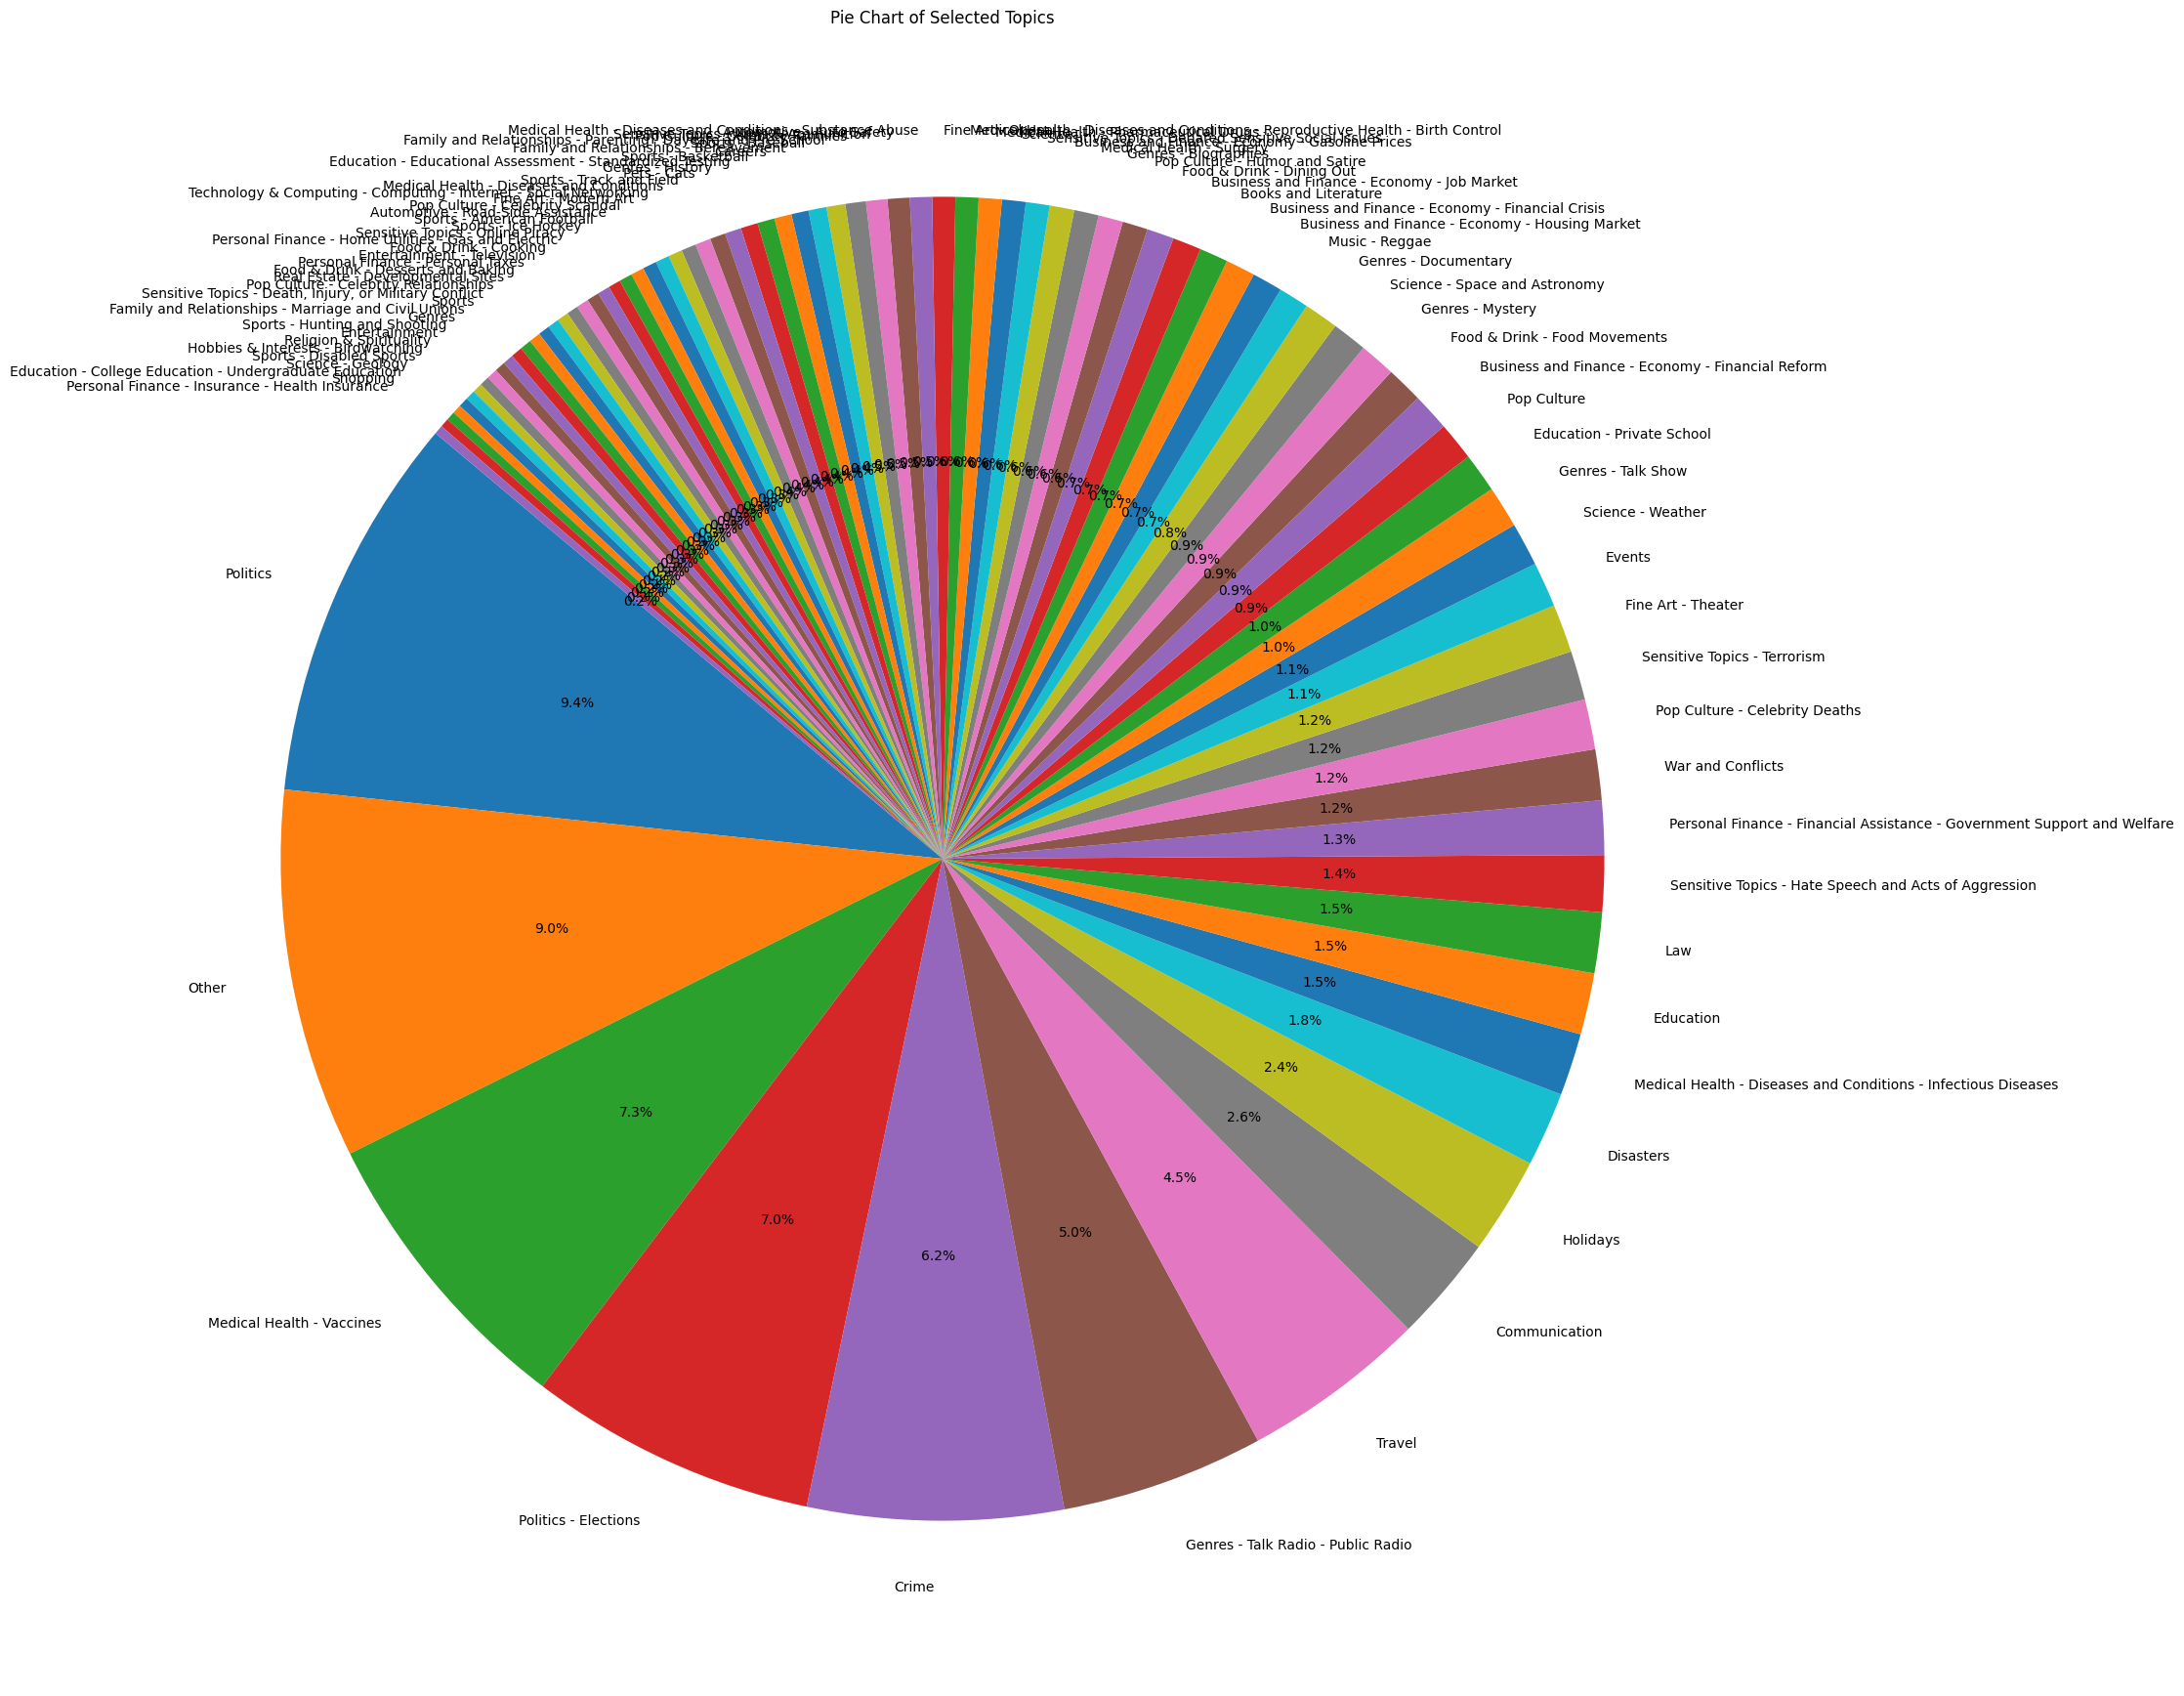

closest_topic_all
Politics                                                               440
Politics - Elections                                                   349
Medical Health - Vaccines                                              331
Crime                                                                  291
Genres - Talk Radio - Public Radio                                     221
                                                                      ... 
Business and Finance - Industries - Biotech and Biomedical Industry      1
Sports - Cricket                                                         1
Attractions                                                              1
Music - Soundtracks, TV and Showtunes                                    1
Real Estate - Land and Farms                                             1
Name: count, Length: 420, dtype: int64


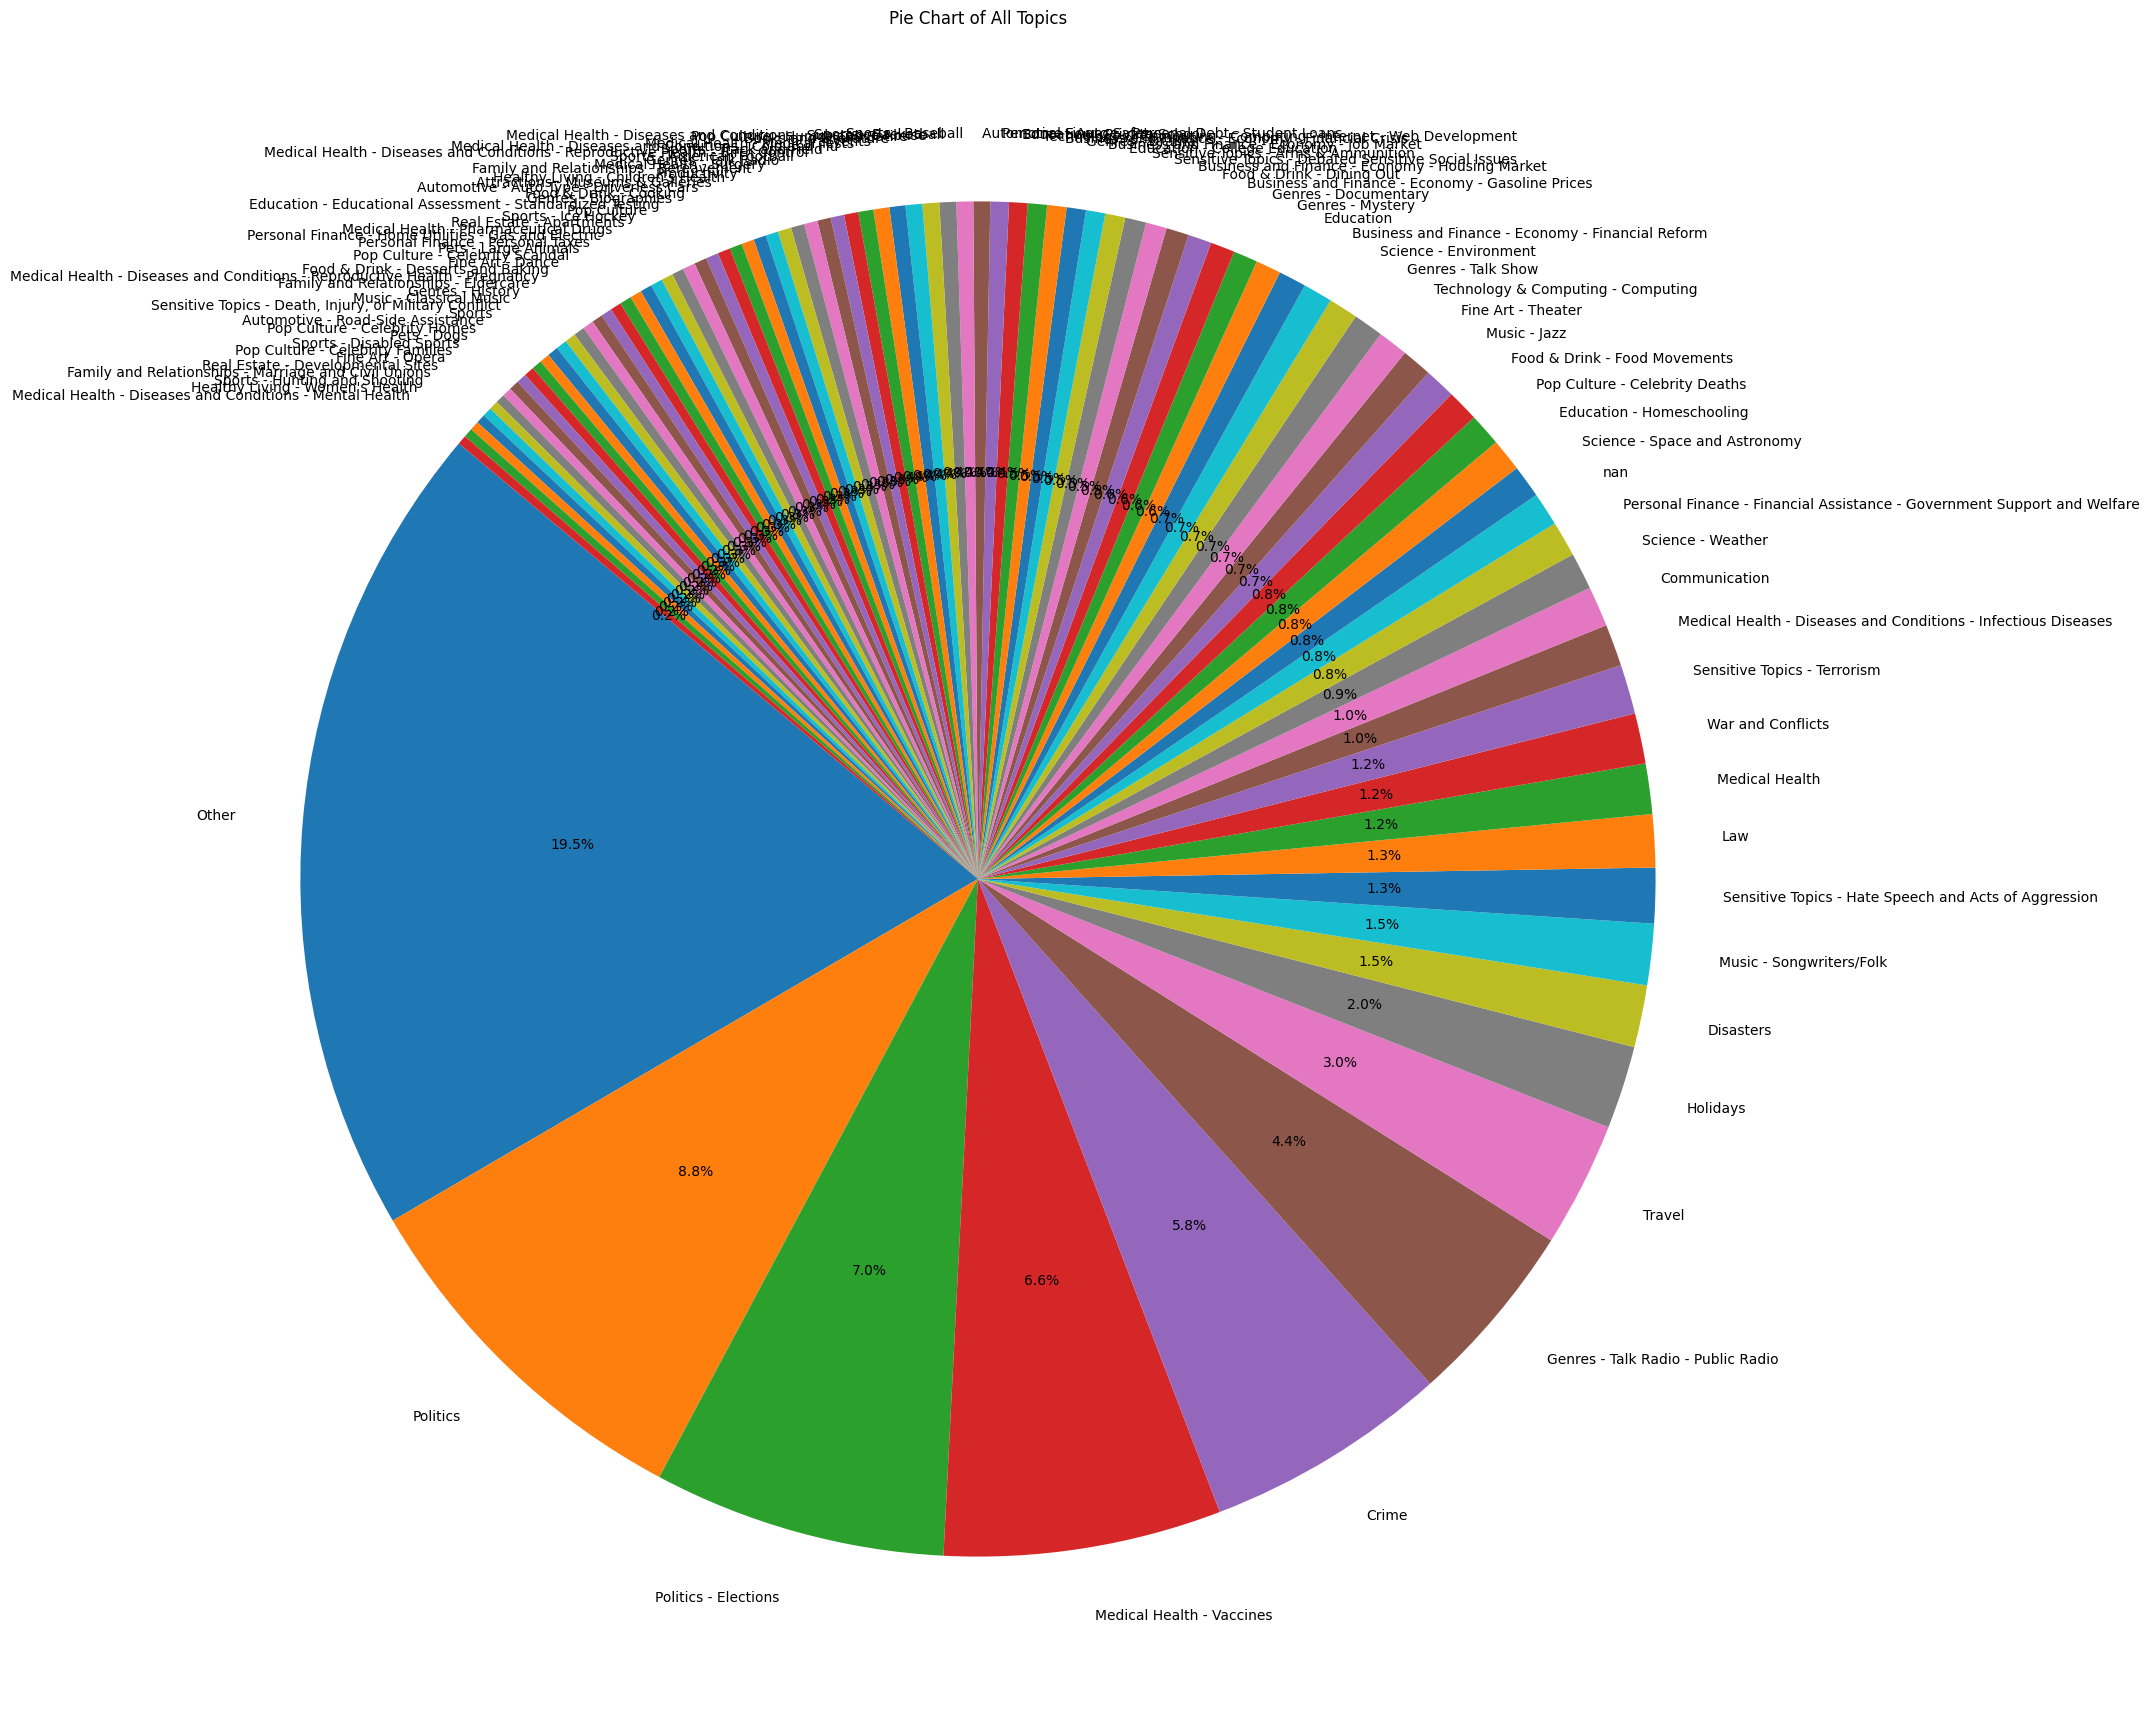

There are 3796 matching labels in 5000 articles. The ratio is 75.92%.
closest_topic_client
Boston City Council         502
Boston Mayor                479
Masschusetts Governor       395
Public Health               308
Masschusetts Legisalture    245
                           ... 
Extremism                     6
Personal Finance              5
Business & Finance            4
Environment                   3
Religion & Spirituality       3
Name: count, Length: 71, dtype: int64


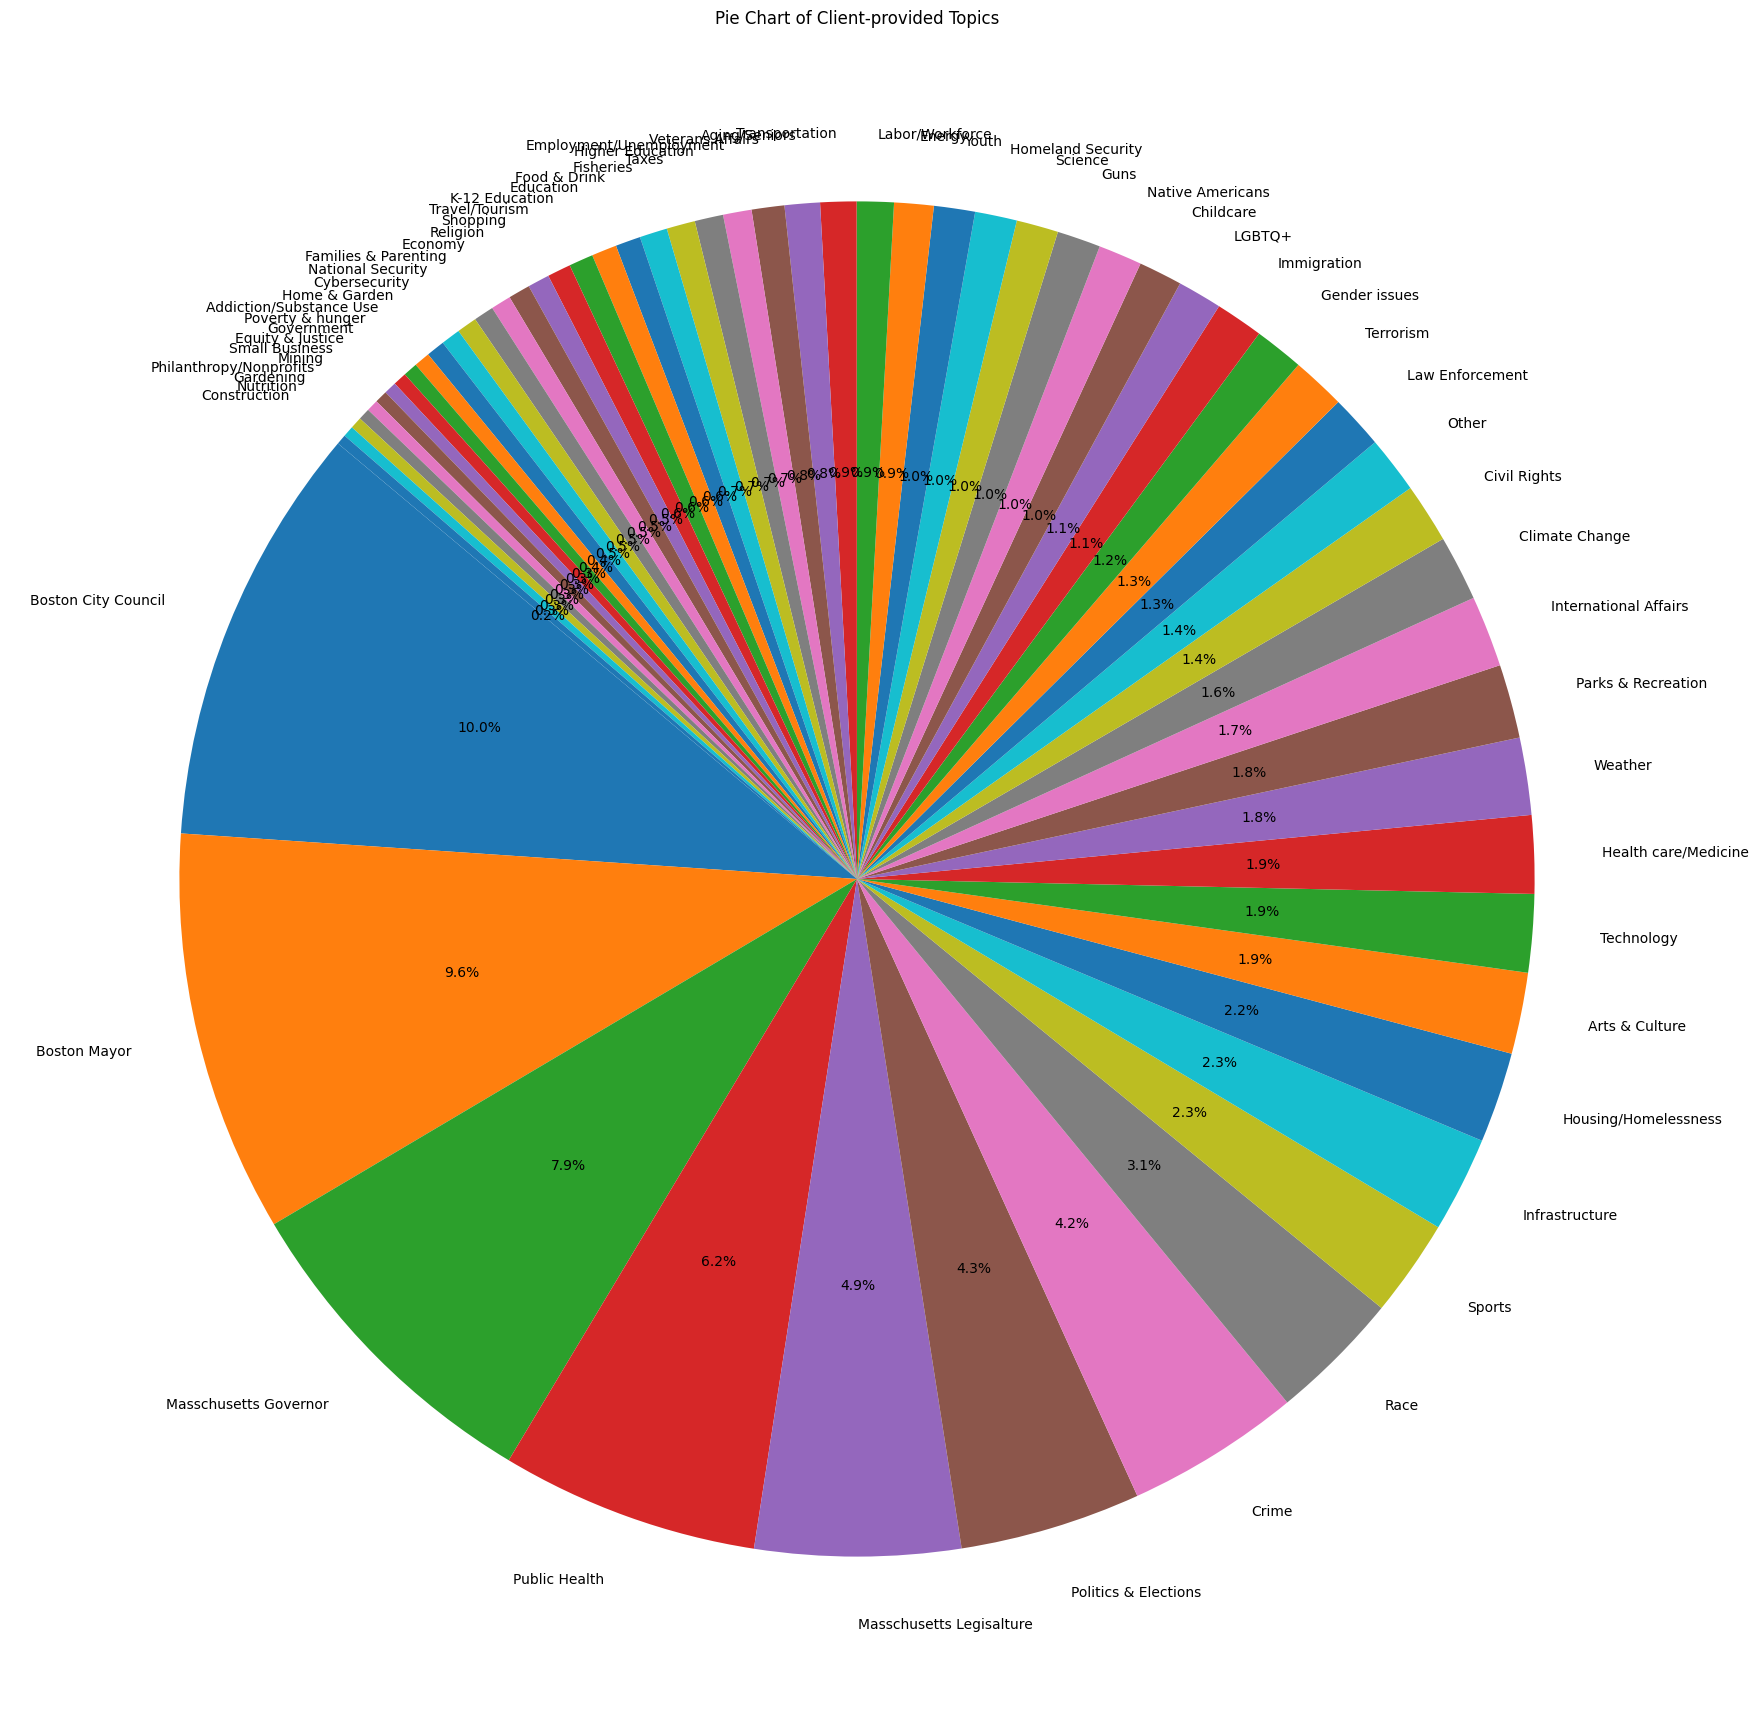

In [33]:
# Analysis on labels from two lists
selected_series = unseen_articles['closest_topic_selected']

# Get the value counts
selected_counts = selected_series.value_counts()
print(selected_counts)
# Identify categories with count <= 10
categories_to_combine = selected_counts[selected_counts <= 10].index

# Create a new category name for combined values
new_category_name = 'Other'

# Replace categories with count 1 with the new category
selected_series = selected_series.apply(lambda x: new_category_name if x in categories_to_combine else x)

# Create a pie chart
plt.figure(figsize=(22, 22))
plt.pie(selected_series.value_counts(), labels=selected_series.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Selected Topics')
plt.show()


all_series = unseen_articles['closest_topic_all']

# Get the value counts
all_counts = all_series.value_counts()
print(all_counts)
# Identify categories with count <= 10
categories_to_combine = all_counts[all_counts <= 10].index

# Create a new category name for combined values
new_category_name = 'Other'

# Replace categories with count 1 with the new category
all_series = all_series.apply(lambda x: new_category_name if x in categories_to_combine else x)

# Create a pie chart
plt.figure(figsize=(22, 22))
plt.pie(all_series.value_counts(), labels=all_series.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of All Topics')
plt.show()

count_matching_rows = len(unseen_articles[unseen_articles['closest_topic_all'] == unseen_articles['closest_topic_selected']])
print(f'There are {count_matching_rows} matching labels in {len(unseen_articles)} articles. The ratio is {count_matching_rows/len(unseen_articles)*100}%.')


client_series = unseen_articles['closest_topic_client']

# Get the value counts
client_counts = client_series.value_counts()
print(client_counts)
# Identify categories with count <= 10
categories_to_combine = client_counts[client_counts <= 10].index

# Create a new category name for combined values
new_category_name = 'Other'

# Replace categories with count 1 with the new category
client_series = client_series.apply(lambda x: new_category_name if x in categories_to_combine else x)

# Create a pie chart
plt.figure(figsize=(22, 22))
plt.pie(client_series.value_counts(), labels=client_series.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Client-provided Topics')
plt.show()

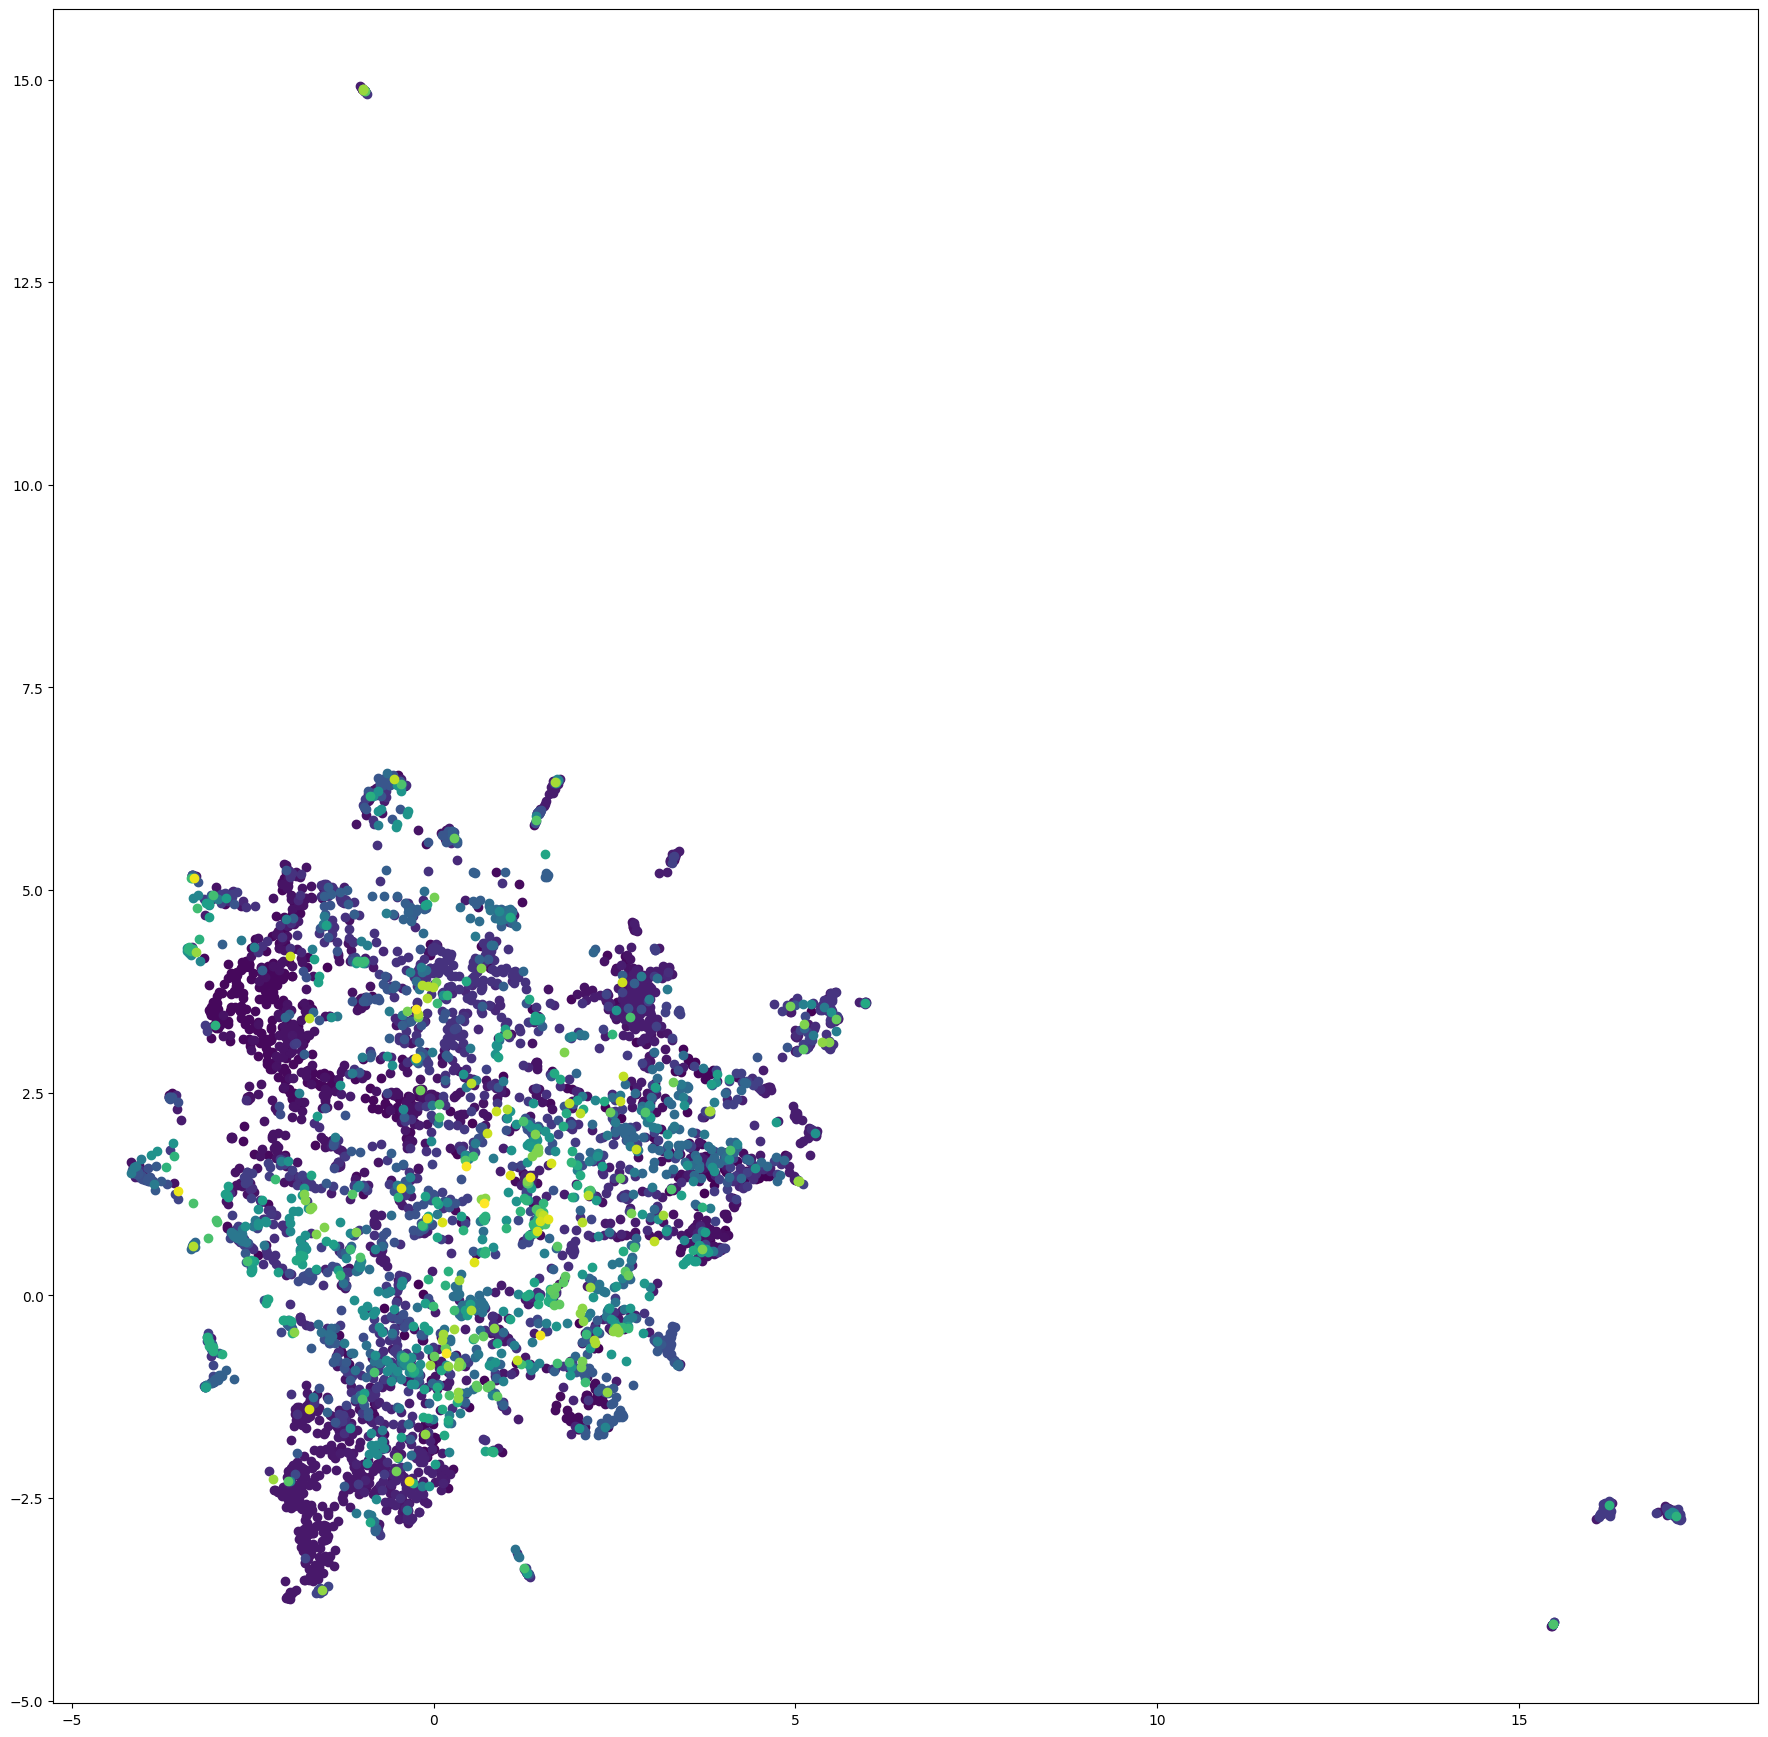

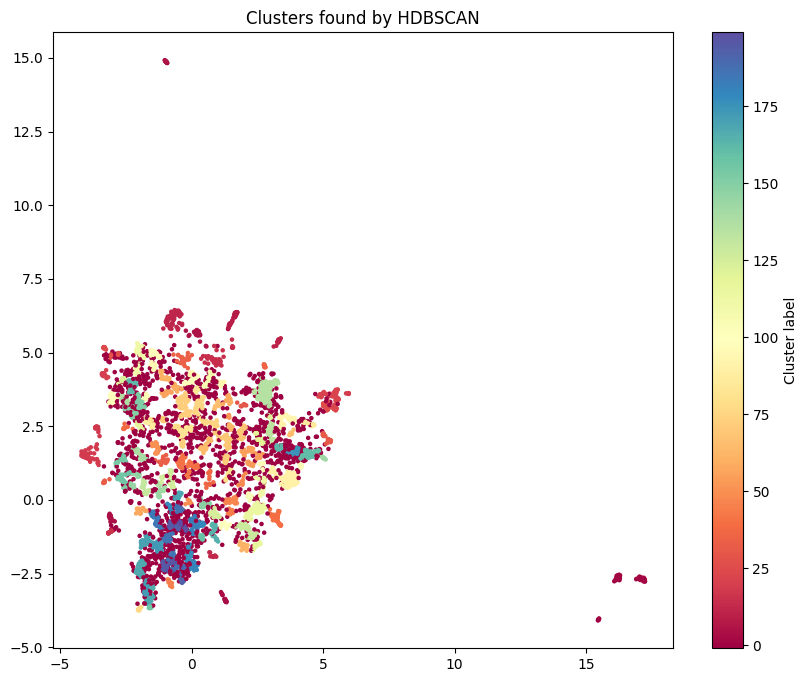

In [44]:
# IF the dafaframe was read from the cached csv file, uncomment these two lines and comment out the alternative line assigning embeddings_matrix.

# embeddings_array = unseen_articles['ada_embedding'].apply(lambda x: np.fromstring(x.strip("[]"), sep=','))
# embeddings_matrix = np.stack(embeddings_array.values)

embeddings_matrix = np.stack(unseen_articles['ada_embedding'].values)

reducer = umap.UMAP()
reduced_data = reducer.fit_transform(embeddings_matrix)

categories = unseen_articles['closest_topic_selected'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))  # Generating colors

plt.figure(figsize=(22, 22))
for category, color in zip(categories, colors):
    mask = unseen_articles['closest_topic_selected'] == category
    plt.scatter(reduced_data[mask, 0], reduced_data[mask, 1], label=category, color=color)

plt.show()

# Clustering with HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(reduced_data)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='Spectral', s=5)
plt.colorbar(label='Cluster label')
plt.title("Clusters found by HDBSCAN")
plt.show()


In [45]:
ari_score = adjusted_rand_score(unseen_articles['closest_topic_selected'], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

Adjusted Rand Index (ARI): 0.0374


In [48]:
# Clustering with HDBSCAN WITHOUT UMAP and calculate new ARI score (just for fun)
clusterer = hdbscan.HDBSCAN(min_cluster_size=300, gen_min_span_tree=True)
cluster_labels_highdim = clusterer.fit_predict(embeddings_matrix)

ari_score = adjusted_rand_score(unseen_articles['closest_topic_selected'], cluster_labels_highdim)
print(f"New Adjusted Rand Index (ARI): {ari_score:.4f}")

New Adjusted Rand Index (ARI): 0.0000
